In [55]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("nfl_pbp.csv")

In [56]:
df = df[['game_date', 'posteam','yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','play_type','score_differential','shotgun','no_huddle']]

df = df.dropna()

In [57]:
train_df = df[(~df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

test_df = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

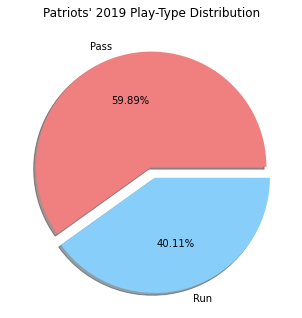

In [58]:
relative_frequency = test_df['play_type'].value_counts()

explode = (0, 0.1)
colors = ['lightcoral', 'lightskyblue']
plt.pie(relative_frequency, labels = ('Pass', 'Run'), autopct='%.2f%%', explode=explode, colors=colors, shadow=True)
plt.title("Patriots' 2019 Play-Type Distribution")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

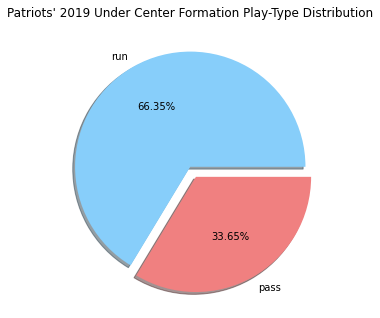

In [59]:
undercenter_df = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass')) & (df.shotgun == 0)]

relative_frequency = undercenter_df['play_type'].value_counts()

explode = (0, 0.1)
colors = ['lightskyblue', 'lightcoral']
plt.pie(relative_frequency, labels = ('run', 'pass'), autopct='%.2f%%', explode=explode, colors=colors, shadow=True)

plt.title("Patriots' 2019 Under Center Formation Play-Type Distribution")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()